<a href="https://colab.research.google.com/github/KevinSolano22/Carpeta3/blob/main/C%C3%B3digo_Python_(PDF_y_CDF).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

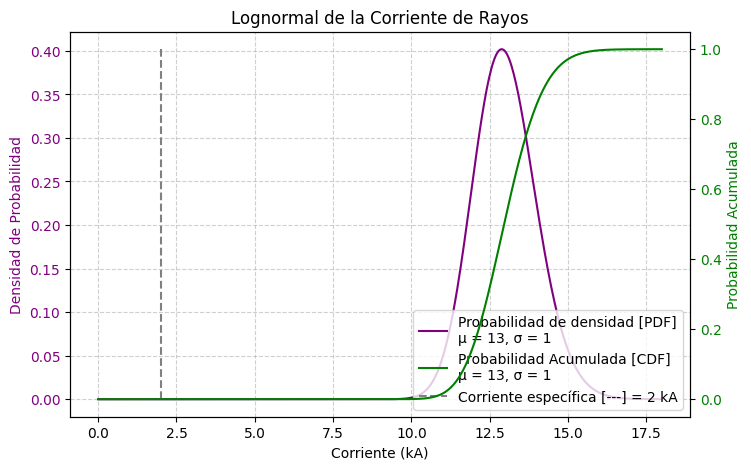

In [14]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import lognorm

def plot_lognormal_cdf_pdf(mean, std_dev, current, current_range):
    # Convertir media y desviación estándar a los parámetros de la lognormal
    sigma = np.sqrt(np.log(1 + (std_dev / mean) ** 2))
    mu = np.log(mean) - 0.5 * sigma**2

    # Crear valores de corriente dentro del rango especificado
    currents = np.linspace(current_range[0], current_range[1], 500)

    # Calcular PDF y CDF
    pdf = lognorm.pdf(currents, s=sigma, scale=np.exp(mu))
    cdf = lognorm.cdf(currents, s=sigma, scale=np.exp(mu))

    # Calcular valores específicos para la corriente seleccionada
    pdf_value = lognorm.pdf(current, s=sigma, scale=np.exp(mu))
    cdf_value = lognorm.cdf(current, s=sigma, scale=np.exp(mu))

    # Graficar PDF y CDF
    fig, ax1 = plt.subplots(figsize=(8, 5))
    ax1.set_xlabel('Corriente (kA)')
    ax1.set_ylabel('Densidad de Probabilidad', color='purple')
    pdf_plot, = ax1.plot(currents, pdf, color='purple', label=f'Probabilidad de densidad [PDF]\nμ = {mean}, σ = {std_dev}')
    ax1.tick_params(axis='y', labelcolor='purple')
    ax1.grid(True, linestyle='--', alpha=0.6)

    ax2 = ax1.twinx()
    ax2.set_ylabel('Probabilidad Acumulada', color='green')
    cdf_plot, = ax2.plot(currents, cdf, color='green', label=f'Probabilidad Acumulada [CDF]\nμ = {mean}, σ = {std_dev}')
    ax2.tick_params(axis='y', labelcolor='green')

    # Línea vertical para la corriente seleccionada en color gris punteado
    current_line, = ax1.plot([current, current], [0, max(pdf)], color='gray', linestyle='--', label=f'Corriente específica [---] = {current} kA')

    # Agregar leyenda con los valores de media, desviación estándar y corriente específica
    legend = ax1.legend(handles=[pdf_plot, cdf_plot, current_line], loc='lower right', frameon=True, fontsize=10)

    plt.title('Lognormal de la Corriente de Rayos')
    plt.show()

# Parámetros de ejemplo
mean = 13  # Media
std_dev = 1  # Desviación estándar
current = 2  # Corriente específica en kA
current_range = (0, 18)  # Rango de corriente en kA

plot_lognormal_cdf_pdf(mean, std_dev, current, current_range)